In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2023-02-23 23:10:33.623895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

In [3]:
type(y_train)

numpy.ndarray

In [4]:
y_train

array([-1,  1, -1, ..., -1,  1, -1])

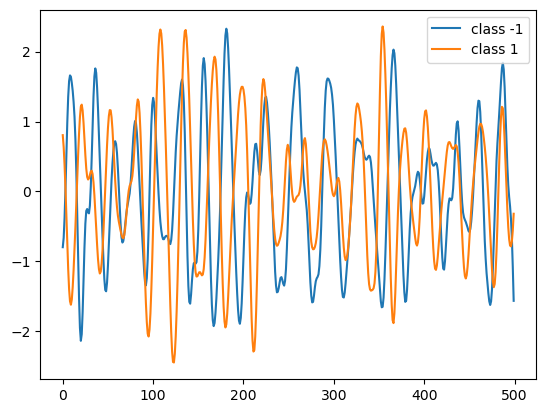

In [5]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [6]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [7]:
num_classes = len(np.unique(y_train))

In [8]:
num_classes

2

In [9]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [10]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [16]:
print(y_train)

[1 0 1 ... 1 1 1]


In [17]:
num_classes

2

In [12]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


2023-02-23 23:10:44.047314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
epochs = 10
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/10
90/90 [==============================] - 9s 81ms/step - loss: 0.2923 - sparse_categorical_accuracy: 0.8799 - val_loss: 0.7330 - val_sparse_categorical_accuracy: 0.6657 - lr: 0.0010
Epoch 2/10
90/90 [==============================] - 7s 81ms/step - loss: 0.3173 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.6377 - val_sparse_categorical_accuracy: 0.6671 - lr: 0.0010
Epoch 3/10
90/90 [==============================] - 7s 82ms/step - loss: 0.2862 - sparse_categorical_accuracy: 0.8788 - val_loss: 0.3025 - val_sparse_categorical_accuracy: 0.8752 - lr: 0.0010
Epoch 4/10
90/90 [==============================] - 7s 83ms/step - loss: 0.2831 - sparse_categorical_accuracy: 0.8844 - val_loss: 0.4794 - val_sparse_categorical_accuracy: 0.7587 - lr: 0.0010
Epoch 5/10
90/90 [==============================] - 7s 82ms/step - loss: 0.2960 - sparse_categorical_accuracy: 0.8750 - val_loss: 0.3522 - val_sparse_categorical_accuracy: 0.8225 - lr: 0.0010
Epoch 6/10
90/90 [======================